<a href="https://colab.research.google.com/github/ANIROODDH/DSP_Project/blob/main/Dsp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !unzip  /content/drive/MyDrive/plant_leaf.zip -d /content/drive/MyDrive/plant_leaf

#### Load necessory libraries

In [ ]:
  #  !pip install --upgrade tensorflow_hub

  #  import tensorflow_hub as hub

  #  model = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim128/2")
  #  embeddings = model(["The rain in Spain.", "falls",
  #                      "mainly", "In the plain!"])

  #  print(embeddings.shape)  #(4,128)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import os
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import imread
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data_dir="/content/drive/MyDrive/plant_leaf"

In [ ]:
# Kind of Leaves
kinds = np.array(os.listdir(data_dir))
print(f"Leaf in this dataset: {kinds}")

Leaf in this dataset: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'ShepherdтАЩs Purse' 'Small-flowered Cranesbill' 'Sugar beet'
 'nonsegmentedv2']


In [ ]:
kinds = np.array([kind for kind in kinds if kind not in ['nonsegmentedv2']])

In [ ]:
kinds

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'ShepherdтАЩs Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype='<U25')

In [ ]:
# Paths of directories
path = data_dir
kind_path = [path + "/" + rice for rice in kinds]
kind_path

['/content/drive/MyDrive/plant_leaf/Black-grass',
 '/content/drive/MyDrive/plant_leaf/Charlock',
 '/content/drive/MyDrive/plant_leaf/Cleavers',
 '/content/drive/MyDrive/plant_leaf/Common Chickweed',
 '/content/drive/MyDrive/plant_leaf/Common wheat',
 '/content/drive/MyDrive/plant_leaf/Fat Hen',
 '/content/drive/MyDrive/plant_leaf/Loose Silky-bent',
 '/content/drive/MyDrive/plant_leaf/Maize',
 '/content/drive/MyDrive/plant_leaf/Scentless Mayweed',
 '/content/drive/MyDrive/plant_leaf/ShepherdтАЩs Purse',
 '/content/drive/MyDrive/plant_leaf/Small-flowered Cranesbill',
 '/content/drive/MyDrive/plant_leaf/Sugar beet']

In [ ]:
total_images=0
# Numbers of flowers for each kinds
for i, kind in enumerate(kind_path):
    print(f"There are {len(os.listdir(kind))} Rice in {kinds[i]}")
    total_images+=len(os.listdir(kind))

There are 309 Rice in Black-grass
There are 452 Rice in Charlock
There are 335 Rice in Cleavers
There are 713 Rice in Common Chickweed
There are 253 Rice in Common wheat
There are 538 Rice in Fat Hen
There are 762 Rice in Loose Silky-bent
There are 257 Rice in Maize
There are 607 Rice in Scentless Mayweed
There are 274 Rice in ShepherdтАЩs Purse
There are 576 Rice in Small-flowered Cranesbill
There are 463 Rice in Sugar beet


In [ ]:
print(total_images)

5539


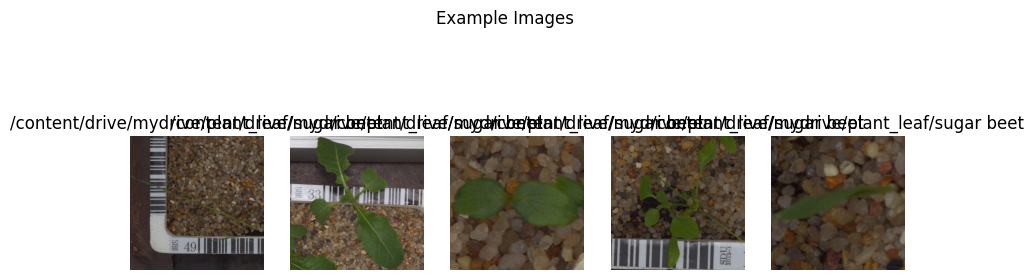

In [ ]:
plt.figure(figsize=(10, 4))
plt.suptitle("Example Images")
num_kinds = len(kinds)
num_subplots = min(num_kinds, 5)
for i in range(num_subplots):
    ax = plt.subplot(1, num_subplots, i + 1)
    path = kind_path[i] + "/" + os.listdir(kind_path[i])[0]
    img = plt.imread(path)
    plt.imshow(img)
    plt.title(kind.capitalize())
    plt.axis("off")

plt.show()

In [ ]:
# All ids
id_df = []
for i in range(len(kinds)):
    id = [img.split(".")[0] for img in os.listdir(kind_path[i])]
    id_df = id_df + id
len(id_df)

5539

In [ ]:
# All kinds
kind_df = []
for i, kind in enumerate(kinds):
    for x in range(len(os.listdir(kind_path[i]))):
        kind_df.append(kind)
len(kind_df)

5539

In [ ]:
# Create a dataframe
df = pd.DataFrame(columns=["id", "kind"])
df["id"] = id_df
df["kind"] = kind_df
df.tail()

,id,kind
5534,107,Sugar beet
5535,108,Sugar beet
5536,109,Sugar beet
5537,11,Sugar beet
5538,110,Sugar beet


In [ ]:
# Check numbers
df["kind"].value_counts()

kind
Loose Silky-bent             762
Common Chickweed             713
Scentless Mayweed            607
Small-flowered Cranesbill    576
Fat Hen                      538
Sugar beet                   463
Charlock                     452
Cleavers                     335
Black-grass                  309
ShepherdтАЩs Purse           274
Maize                        257
Common wheat                 253
Name: count, dtype: int64

In [ ]:
filenames = []
for i in range(len(kinds)):
    file = [kind_path[i] + "/" + kind for kind in os.listdir(kind_path[i])]
    filenames = filenames + file
filenames[:5]

['/content/drive/MyDrive/plant_leaf/Black-grass/10.png',
 '/content/drive/MyDrive/plant_leaf/Black-grass/1.png',
 '/content/drive/MyDrive/plant_leaf/Black-grass/100.png',
 '/content/drive/MyDrive/plant_leaf/Black-grass/101.png',
 '/content/drive/MyDrive/plant_leaf/Black-grass/102.png']

In [ ]:

# Check a random flower
print(filenames[2317])
print(df.loc[2317])

/content/drive/MyDrive/plant_leaf/Fat Hen/294.png
id          294
kind    Fat Hen
Name: 2317, dtype: object


In [ ]:
boolean_kinds = [kind == kinds for kind in kind_df]
boolean_kinds[:5]

[array([ True, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([ True, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([ True, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([ True, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([ True, False, False, False, False, False, False, False, False,
        False, False, False])]

In [ ]:
X = filenames
y = boolean_kinds

In [ ]:
from sklearn.utils import shuffle
Xs, ys = shuffle(X, y,random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xs,
                                                    ys,
                                                    test_size=0.2,
                                                    random_state=18,
                                                    stratify=ys)
len(X_train), len(X_test), len(y_train), len(y_test)

(4431, 1108, 4431, 1108)

In [ ]:
X_train[:3], y_train[:3]

(['/content/drive/MyDrive/plant_leaf/Fat Hen/203.png',
  '/content/drive/MyDrive/plant_leaf/Loose Silky-bent/546.png',
  '/content/drive/MyDrive/plant_leaf/Scentless Mayweed/190.png'],
 [array([False, False, False, False, False,  True, False, False, False,
         False, False, False]),
  array([False, False, False, False, False, False,  True, False, False,
         False, False, False]),
  array([False, False, False, False, False, False, False, False,  True,
         False, False, False])])

In [ ]:
image = imread(filenames[15])
image.shape

(212, 212, 3)

In [ ]:
image.max(), image.min()

(0.7019608, 0.0)

In [ ]:
image[:2]

array([[[0.25882354, 0.19607843, 0.14117648],
        [0.24313726, 0.17254902, 0.11372549],
        [0.27058825, 0.20392157, 0.13725491],
        ...,
        [0.3137255 , 0.24313726, 0.17254902],
        [0.34901962, 0.2784314 , 0.21176471],
        [0.3529412 , 0.28235295, 0.21568628]],

       [[0.20392157, 0.11764706, 0.06666667],
        [0.21960784, 0.14117648, 0.08235294],
        [0.3019608 , 0.23529412, 0.17254902],
        ...,
        [0.3137255 , 0.24313726, 0.17254902],
        [0.34117648, 0.26666668, 0.20392157],
        [0.3372549 , 0.2627451 , 0.19607843]]], dtype=float32)

In [ ]:
# turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 212, 3), dtype=float32, numpy=
array([[[0.25882354, 0.19607843, 0.14117648],
        [0.24313726, 0.17254902, 0.11372549],
        [0.27058825, 0.20392157, 0.13725491],
        ...,
        [0.3137255 , 0.24313726, 0.17254902],
        [0.34901962, 0.2784314 , 0.21176471],
        [0.3529412 , 0.28235295, 0.21568628]],

       [[0.20392157, 0.11764706, 0.06666667],
        [0.21960784, 0.14117648, 0.08235294],
        [0.3019608 , 0.23529412, 0.17254902],
        ...,
        [0.3137255 , 0.24313726, 0.17254902],
        [0.34117648, 0.26666668, 0.20392157],
        [0.3372549 , 0.2627451 , 0.19607843]]], dtype=float32)>

In [ ]:
img_size = 224

In [ ]:
# Create a function for preprocessing images

def process_image(image_path, img_size=img_size):
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[img_size, img_size])

  return image

In [ ]:
process_image(X[17]), tf.constant(y[17])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.29803923, 0.18431373, 0.1254902 ],
         [0.32057074, 0.21185225, 0.15803573],
         [0.35203084, 0.25705534, 0.20451681],
         ...,
         [0.3623424 , 0.28858525, 0.23996834],
         [0.35652998, 0.27668053, 0.2296217 ],
         [0.34901962, 0.26666668, 0.21960786]],
 
        [[0.2780112 , 0.14926471, 0.10295869],
         [0.3005427 , 0.17680323, 0.13390599],
         [0.32006648, 0.20808059, 0.16456138],
         ...,
         [0.35634074, 0.2765819 , 0.23046851],
         [0.3533336 , 0.26938245, 0.22482713],
         [0.34901962, 0.26416317, 0.21960786]],
 
        [[0.26666668, 0.12785365, 0.09487046],
         [0.28223532, 0.1474346 , 0.11596022],
         [0.29538748, 0.17065006, 0.13691407],
         ...,
         [0.34638867, 0.26323032, 0.21759592],
         [0.34711313, 0.26083863, 0.2167067 ],
         [0.35057774, 0.26430324, 0.22116598]],
 
        ...,
 
        [[0.4871855 , 0.45269683

In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label (image_path, label):
  image = process_image(image_path)
  return image, label

In [ ]:
batch_size = 32

In [ ]:
# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=batch_size, test_data=False):
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
        data_batch = data.map(process_image).batch(batch_size)
        return data_batch
    else:
        print("Creating data batches...")
        # Turn filepaths and labels into Tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                   tf.constant(y)))
        # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
        data = data.shuffle(buffer_size=len(X))

        # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
        data = data.map(get_image_label)

        # Turn the training data into batches
        data_batch = data.batch(batch_size)
        return data_batch

In [ ]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
test_data = create_data_batches(X_test, test_data=True)

Creating data batches...
Creating test data batches...


In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images[:2], train_labels[:2]

(array([[[[0.33350912, 0.29287606, 0.30856234],
          [0.34182003, 0.3005714 , 0.3162577 ],
          [0.34276626, 0.299643  , 0.31531176],
          ...,
          [0.28939083, 0.20780824, 0.1183825 ],
          [0.31229424, 0.23214294, 0.1522803 ],
          [0.32046428, 0.2382696 , 0.16218415]],
 
         [[0.3515693 , 0.30843204, 0.32175487],
          [0.35579   , 0.31265274, 0.32597557],
          [0.34676456, 0.3036273 , 0.31930664],
          ...,
          [0.29962558, 0.21882384, 0.1325529 ],
          [0.310743  , 0.23043354, 0.14571714],
          [0.31401405, 0.23197414, 0.1453691 ]],
 
         [[0.35766456, 0.31848037, 0.3263235 ],
          [0.36077377, 0.32158613, 0.3317716 ],
          [0.36073202, 0.3215513 , 0.33329847],
          ...,
          [0.2864665 , 0.20801768, 0.12569971],
          [0.32393897, 0.24395996, 0.16319327],
          [0.32160014, 0.2392472 , 0.1576996 ]],
 
         ...,
 
         [[0.15536399, 0.12318967, 0.11143892],
          [0.16943

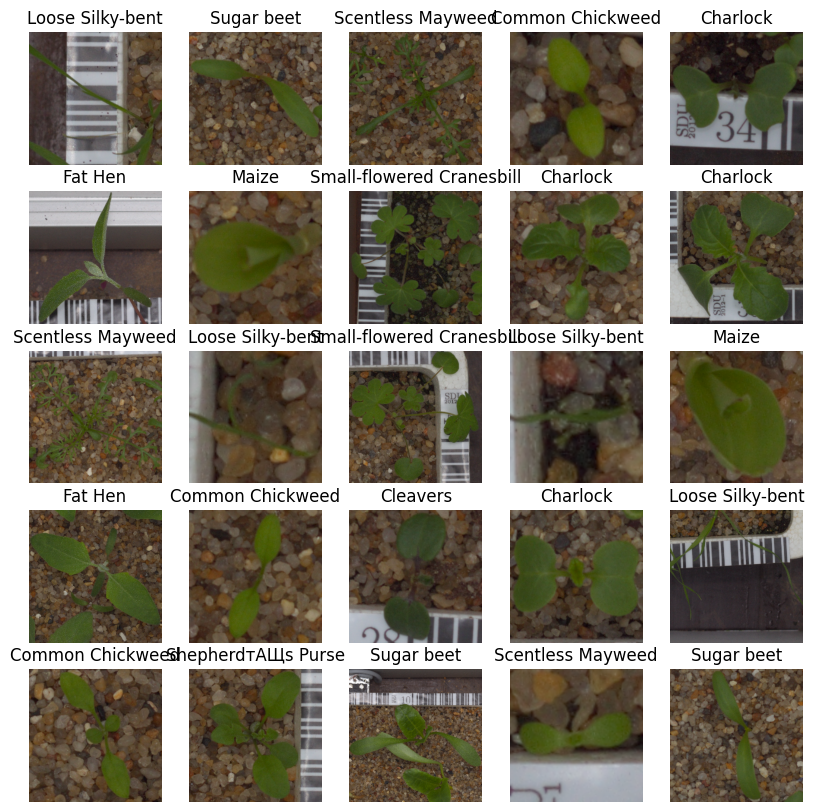

In [ ]:
# Visualizing data batches
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i])
    plt.title(kinds[train_labels[i].argmax()])
    plt.axis("off")

In [ ]:
# Setup input shape to the model
input_shape = [None, img_size, img_size, 3] # batch, height, width, colour channels

# Setup output shape of our model
output_shape = len(kinds)

model_url="https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-224-feature-vector/versions/2"

In [ ]:
model = tf.keras.Sequential([
    hub.KerasLayer(model_url), #input layer
    tf.keras.layers.Dense(units=output_shape,
                          activation="softmax") # output layer
])

In [ ]:
model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

In [ ]:
model.build(input_shape)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              410208    
                                                                 
 dense (Dense)               (None, 12)                15372     
                                                                 
Total params: 425580 (1.62 MB)
Trainable params: 15372 (60.05 KB)
Non-trainable params: 410208 (1.56 MB)
_________________________________________________________________


In [ ]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                  patience=3)

In [ ]:
model.fit(x=train_data,
            epochs=150,
            callbacks=[early_stopping])

Epoch 1/150
139/139 [==============================] - 14s 96ms/step - loss: 0.0374 - accuracy: 0.9980
Epoch 2/150
139/139 [==============================] - 14s 101ms/step - loss: 0.0355 - accuracy: 0.9980
Epoch 3/150
139/139 [==============================] - 14s 102ms/step - loss: 0.0344 - accuracy: 0.9986
Epoch 4/150
139/139 [==============================] - 14s 103ms/step - loss: 0.0334 - accuracy: 0.9984
Epoch 5/150
139/139 [==============================] - 14s 98ms/step - loss: 0.0330 - accuracy: 0.9984
Epoch 6/150
139/139 [==============================] - 14s 101ms/step - loss: 0.0311 - accuracy: 0.9982


In [ ]:
predictions = model.predict(test_data)
predictions

35/35 [==============================] - 8s 188ms/step


array([[1.6948586e-15, 9.6768898e-01, 1.4087009e-07, ..., 1.8356573e-06,
        3.1595442e-02, 3.8468073e-09],
       [7.5279696e-12, 2.2740214e-06, 2.3269183e-04, ..., 5.4020984e-07,
        1.7328224e-08, 1.8273731e-03],
       [8.0446339e-01, 2.5025915e-06, 1.5035539e-05, ..., 2.6695656e-07,
        3.6435954e-09, 4.9223690e-06],
       ...,
       [1.4970513e-01, 4.5355200e-12, 8.7515045e-06, ..., 2.3164412e-07,
        2.3176430e-09, 5.3354245e-02],
       [3.4529618e-15, 1.5560949e-03, 6.9522084e-06, ..., 9.7099227e-01,
        2.6950767e-02, 1.4429905e-11],
       [4.4320250e-13, 6.1003571e-05, 1.9387476e-09, ..., 1.7067597e-13,
        7.0100376e-13, 3.5981552e-06]], dtype=float32)

In [ ]:
true_labels = [kinds[np.argmax(data)] for data in y_test]
pred_labels = [kinds[np.argmax(pred)] for pred in predictions]

In [ ]:
true_labels[:5]

['Charlock', 'Common Chickweed', 'Black-grass', 'Black-grass', 'Black-grass']

In [ ]:
pred_labels[:5]

['Charlock',
 'Common Chickweed',
 'Black-grass',
 'Loose Silky-bent',
 'Black-grass']

In [ ]:
print(accuracy_score(true_labels, pred_labels))

0.8375451263537906


In [ ]:
# Create a function to save a model.
def save_model(model,suffix=None):

  # Create a model directory pathname with current time
  modeldir = "/content/drive/MyDrive/plant_leaf"
  model_path =modeldir+"-"+ suffix +".h5"  # save format of model
  print(f"Saving model to:{model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
save_model(model,"Mobilenet_v2_1")

NameError: name 'save_model' is not defined

# Prediction Using Saved Model


In [ ]:
import tensorflow_hub as hub


saved_model = tf.keras.models.load_model('/content/drive/MyDrive/plant_leaf-Mobilenet_v2.h5', custom_objects={'KerasLayer': hub.KerasLayer})

In [ ]:
predictions_saved = saved_model.predict(test_data)
predictions_saved

In [ ]:
predictions_saved[0]

array([1.6948383e-15, 9.6768850e-01, 1.4086881e-07, 6.3818200e-09,
       6.2952391e-15, 3.5619660e-08, 2.2331267e-20, 7.1369717e-04,
       1.0376013e-09, 1.8356441e-06, 3.1595789e-02, 3.8467909e-09],
      dtype=float32)

In [ ]:
true_labels_saved = [kinds[np.argmax(data)] for data in y_test]
pred_labels_saved = [kinds[np.argmax(pred)] for pred in predictions_saved]

In [ ]:
print(accuracy_score(true_labels_saved, pred_labels_saved))

0.8375451263537906


In [ ]:
pred_labels_saved[0]

'Charlock'

In [ ]:
# Create a function for preprocessing images
def process_image(image_path, img_size=img_size):
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[img_size, img_size])
  image = tf.expand_dims(image, axis=0)

  return image

In [ ]:
imgpath = "/content/drive/MyDrive/plant_leaf/Fat Hen/108.png"
imglabel="Fat Hen"

In [ ]:
img=process_image(imgpath)

In [ ]:
img.shape

TensorShape([1, 224, 224, 3])

In [ ]:
pred_label=saved_model.predict(img)

1/1 [==============================] - 0s 91ms/step


In [ ]:
pred_label =kinds[np.argmax(pred_label)]

In [ ]:
pred_label,imglabel

('Fat Hen', 'Fat Hen')

# Implement on Gradio!!

In [ ]:
def Image_Label_prediction(image):

  img_size=224
  # Pre-process..
  img = tf.image.decode_jpeg(image, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  img = tf.image.resize(img, size=[img_size, img_size])
  img = tf.expand_dims(img, axis=0)

  # type of leaves..
  Leaves=['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
      'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
      'Scentless Mayweed', 'ShepherdтАЩs Purse',
      'Small-flowered Cranesbill', 'Sugar beet']

  # Load model...
  Model = tf.keras.models.load_model('/content/drive/MyDrive/plant_leaf-Mobilenet_v2.h5', custom_objects={'KerasLayer': hub.KerasLayer})

  # prediction
  pred=Model.predict(img)
  # find label
  Label =Leaves[np.argmax(pred)]

  return Label

In [ ]:
import gradio as gr
# Create the interface
Image_Classifier = gr.Interface(fn=Image_Label_prediction, inputs="image", outputs="text")

In [ ]:
Image_Classifier.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://929620dcf8655b06ab.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
# input_image="/content/drive/MyDrive/plant_leaf/Charlock/1.png"

In [ ]:
import tensorflow_hub as hub

# Load the saved model
saved_model = tf.keras.models.load_model('/content/drive/MyDrive/plant_leaf-Mobilenet_v2.h5', custom_objects={'KerasLayer': hub.KerasLayer})

# Define the function for image label prediction
def Image_Label_prediction(image):

    img_size = 224

    # Pre-process the image
    img = tf.image.decode_jpeg(image, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, size=[img_size, img_size])
    img = tf.expand_dims(img, axis=0)

    # Define the labels
    Leaves = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
              'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
              'Scentless Mayweed', 'ShepherdтАЩs Purse',
              'Small-flowered Cranesbill', 'Sugar beet']

    # Make predictions
    pred = saved_model.predict(img)

    # Find the label
    label = Leaves[np.argmax(pred)]

    return label

# Create the Gradio interface
import gradio as gr
Image_Classifier = gr.Interface(fn=Image_Label_prediction, inputs="image", outputs="text")


In [ ]:
# Launch the interface
Image_Classifier.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://632c34093cb562ed11.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
